In [143]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint



import warnings
warnings.filterwarnings('ignore')

from scipy.stats import sem

# Import various csv files
list_detail = "airbnb-open-data-in-nyc/listings_detail.csv"
list_summary = "airbnb-open-data-in-nyc/listings_summary.csv"
list_reviewdet = "airbnb-open-data-in-nyc/reviews_detail.csv"
list_calenndar_detail = "airbnb-open-data-in-nyc/calendar_detail.csv"
list_sumdet = "listing_summarydetail_spend.csv"
list_cd = "Top_Spend.csv"


ld_df = pd.read_csv(list_detail)
ls_df = pd.read_csv(list_summary)
lrd_df = pd.read_csv(list_reviewdet)
cd_df = pd.read_csv(list_calenndar_detail)
sdet_df = pd.read_csv(list_sumdet)
spend_df = pd.read_csv(list_cd)


#Creat Data Frame with list detail 
pd.DataFrame(ls_df)

spend_df.dtypes

Listing ID                    int64
Total Spend by ID           float64
Average Spend by ID         float64
Number or Listings by ID      int64
dtype: object

In [144]:
ld_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [145]:
pd.DataFrame(sdet_df)


sdet_df.drop('Unnamed: 0', axis=1)

spend_df = spend_df.rename(columns={'Listing ID': 'id'})

# Merge Calendar Data Analysis from charles with list detail csv

new_df = pd.merge(spend_df, ld_df,on=['id'],how='inner')

new_df = new_df.rename(columns={'Total Spend by ID': 'total_spend', 'Average Spend by ID': 'avg_spend','Number or Listings by ID': 'list_number', 'neighbourhood_group_cleansed': 'neighbourhood_group'})

new_df



,id,total_spend,avg_spend,list_number,listing_url,scrape_id,last_scraped,name,summary,space,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12955683,3639272.00,9998.00,364,https://www.airbnb.com/rooms/12955683,20200000000000.00,10/3/2017,Great location Apt,Apt is on the Amsterdam Ave; near apt has a lo...,None,...,f,nan,NaN,f,f,flexible,f,f,1,0.12
1,2953058,2920000.00,8000.00,365,https://www.airbnb.com/rooms/2953058,20200000000000.00,10/2/2017,Film Location,"RATES Parlor floor only living room, den, din...","Built in 1887, this magnificent landmarked 10,...",...,f,nan,NaN,f,f,strict,t,t,11,0.08
2,16810657,2151672.00,5911.19,364,https://www.airbnb.com/rooms/16810657,20200000000000.00,10/2/2017,Special Event @ Northern Lights Mansion. ( 6 B...,NLM will be gladly to offer Houston resident 5...,The house is very convenient within walking di...,...,f,nan,NaN,t,f,strict,f,f,7,nan
3,13910919,2121181.00,5843.47,363,https://www.airbnb.com/rooms/13910919,20200000000000.00,10/2/2017,"Luxury Home, Luxury room, Very safe",My place is 15 minute from JFK Airport.,NaN,...,f,nan,NaN,t,f,flexible,f,f,2,nan
4,1448703,1825000.00,5000.00,365,https://www.airbnb.com/rooms/1448703,20200000000000.00,10/2/2017,Beautiful 1 Bedroom in Nolita/Soho,This is the most convenient apartment you will...,NaN,...,f,nan,NaN,f,f,flexible,t,t,1,0.04
5,18051877,1820000.00,5000.00,364,https://www.airbnb.com/rooms/18051877,20200000000000.00,10/3/2017,Turn of The Century Film Location,Victorian elegance at its finest with this tur...,NaN,...,f,nan,NaN,f,f,flexible,f,f,7,nan
6,17416959,1753150.00,4829.61,363,https://www.airbnb.com/rooms/17416959,20200000000000.00,10/3/2017,4 BED ROOMS at Northern Lights Mansion. (sleep...,"Great for corporate or group traveling, a big ...","Exclusive florist, catering, and a private che...",...,f,nan,NaN,t,f,moderate,f,f,7,nan
7,2952861,1642500.00,4500.00,365,https://www.airbnb.com/rooms/2952861,20200000000000.00,10/2/2017,Photography Location,"RATES Parlor floor only living room, den, din...","Built in 1887, this magnificent landmarked 10,...",...,f,nan,NaN,f,f,strict,t,t,11,0.08
8,15307748,1384240.00,3802.86,364,https://www.airbnb.com/rooms/15307748,20200000000000.00,10/3/2017,Warehouse Building w/White Gallery & Vintage Loft,Centrally located 1920's brick building with a...,"1st floor: 1,200 sf. white-brick walled galler...",...,f,nan,NaN,f,f,strict,f,f,3,0.41
9,16594414,1357100.00,3718.08,365,https://www.airbnb.com/rooms/16594414,20200000000000.00,10/2/2017,THE BEST PRICE RENTAL TOWNHOUSE IN West Village,Live in the West Village near the Hudson River...,The wait is over! Seize this rare opportunity ...,...,f,nan,NaN,f,f,strict,f,f,1,0.14


In [146]:
# Export New dataframe in as a backup for analysis before making changes

new_df.to_csv("Top_Rev.csv", encoding='utf-8')

In [147]:
# List of each column in Master Data Frame
new_df.columns

Index(['id', 'total_spend', 'avg_spend', 'list_number', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', '

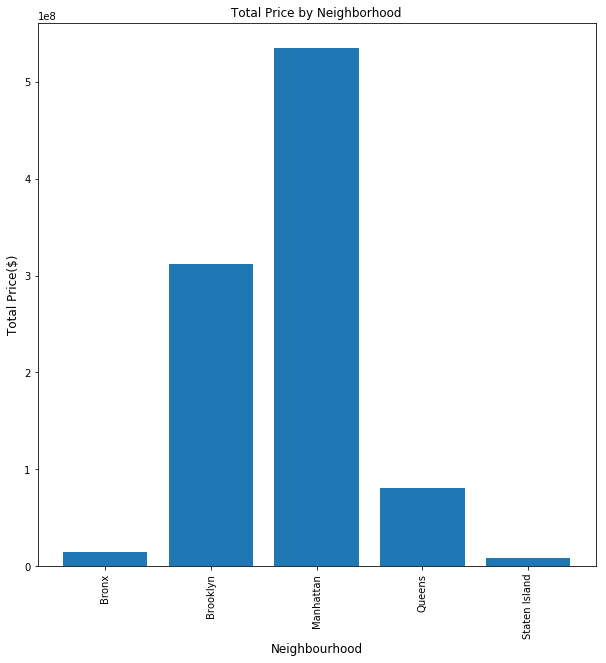

<Figure size 432x288 with 0 Axes>

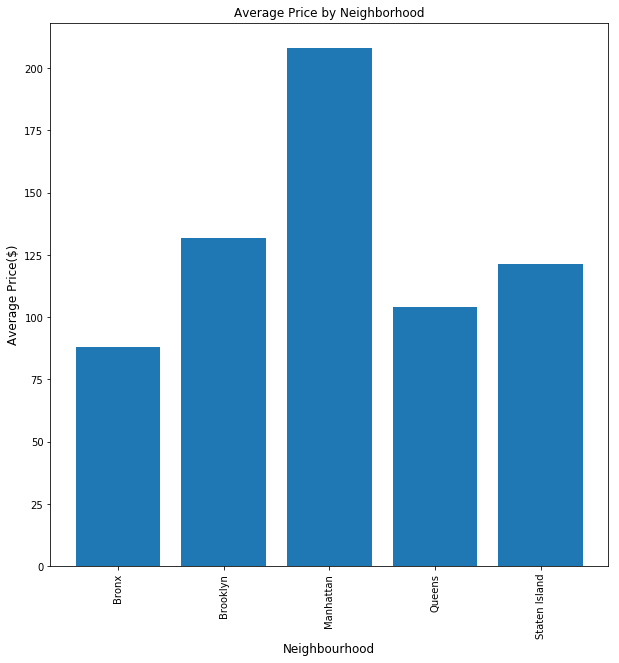

<Figure size 432x288 with 0 Axes>

In [148]:
spend_group = new_df[["id","neighbourhood_group",'avg_spend', 'total_spend', 'list_number']]

# spend_group("{0:.2f}".format(avg_spend))

pd.DataFrame(spend_group)

#Group by key metrics gfor Boroughs aka Neighbourhood groups

avg_spend_mean = spend_group.groupby("neighbourhood_group")['avg_spend'].mean().round(2)


avg_spend_sum = spend_group.groupby("neighbourhood_group")['avg_spend'].sum().round(2)

tot_spend_mean = spend_group.groupby('neighbourhood_group')['total_spend'].mean().round(2)


tot_spend_sum = spend_group.groupby('neighbourhood_group')['total_spend'].sum().round(2)


#Create Grants

plt.figure(figsize = (10,10))
plt.bar(range(len(tot_spend_sum)),tot_spend_sum.values)
plt.xticks(range(len(tot_spend_sum.values)),list(tot_spend_sum.index), rotation=90)
plt.title("Total Price by Neighborhood")

plt.ylabel('Total Price($)', fontsize=12)
plt.xlabel('Neighbourhood', fontsize=12)

plt.savefig("Images/Total Price by Neigbourhood.png")
plt.show()
plt.tight_layout()

plt.figure(figsize = (10,10))
plt.bar(range(len(avg_spend_mean)),avg_spend_mean.values)
plt.xticks(range(len(avg_spend_mean.values)),list(avg_spend_mean.index), rotation=90)
plt.title("Average Price by Neighborhood")

plt.ylabel('Average Price($)', fontsize=12)
plt.xlabel('Neighbourhood', fontsize=12)

plt.savefig("Images/Average Price by Neigbourhood.png")
plt.show()
plt.tight_layout()



In [149]:
#Determine Highest earning 

group_id = spend_group.groupby('id')['total_spend'].mean()

pd.DataFrame(group_id)

group_id = group_id.sort_values(axis=0, ascending=False)

group_id

id
12955683   3639272.00
2953058    2920000.00
16810657   2151672.00
13910919   2121181.00
1448703    1825000.00
18051877   1820000.00
17416959   1753150.00
2952861    1642500.00
15307748   1384240.00
16594414   1357100.00
18323408   1335479.00
13915528   1143450.00
14730708   1095000.00
18071399   1092000.00
363673     1092000.00
17666300    992475.00
19507918    970351.00
14800877    937489.00
4586448     912500.00
14408114    912500.00
2939700     912500.00
14490720    910000.00
13250484    905000.00
20649348    890000.00
14590978    885000.00
18094418    799900.00
10314411    795331.00
11039478    773590.00
15857259    772652.00
7923681     771600.00
              ...    
7150327         52.00
20450486        52.00
15855646        51.00
13005436        50.00
10298106        50.00
15742303        50.00
16520567        50.00
19677221        49.00
14690075        49.00
20873362        48.00
12947660        48.00
17223884        45.00
8400115         45.00
21009103        45.00
2113855

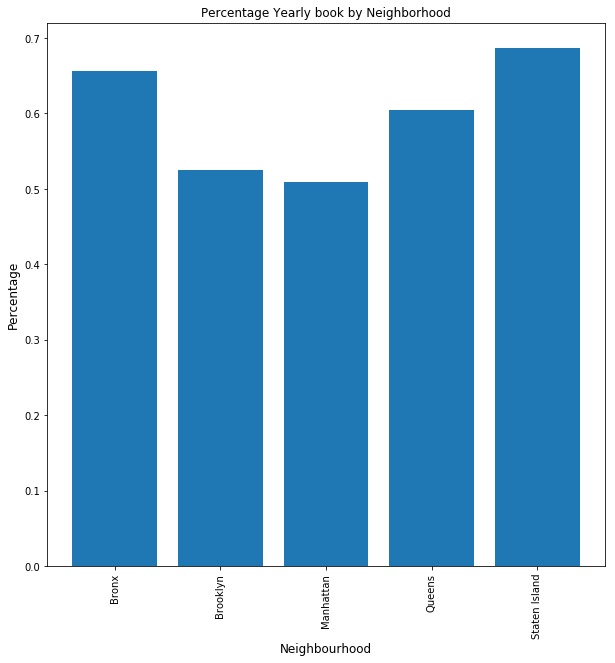

<Figure size 432x288 with 0 Axes>

In [150]:
spend_group = new_df[["id","neighbourhood_group",'avg_spend', 'total_spend', 'list_number']]
spend_group

spend_group = spend_group.groupby('neighbourhood_group')['list_number'].mean()

per_book_year = spend_group/365

per_book_year

#Crete Graph

plt.figure(figsize = (10,10))
plt.bar(range(len(per_book_year)),per_book_year.values)
plt.xticks(range(len(per_book_year.values)),list(per_book_year.index), rotation=90)
plt.title("Percentage Yearly book by Neighborhood")


plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Neighbourhood', fontsize=12)

plt.savefig("Percentage Yearly book by Neighborhood.png")
plt.show()
plt.tight_layout()


In [151]:
# Create new Data frame to analyze zipcode

spend_zip = new_df[["id","zipcode",'avg_spend', 'total_spend', 'list_number']]
spend_zip

spend_zipm = spend_zip.groupby('zipcode')['avg_spend'].mean()

spend_zips = spend_zip.groupby('zipcode')['avg_spend'].sum()

spend_zipc = spend_zip.groupby('zipcode')['avg_spend'].count()


summary = pd.DataFrame({'avg spend meand':spend_zipm,'avg spend sum':spend_zips,'avg spend count':spend_zipc})

summary

,avg spend meand,avg spend sum,avg spend count
zipcode,,,
7302.0,188.47,188.47,1
10001.0,275.36,53970.74,196
10002.0,197.48,38508.85,195
10003.0,225.04,82588.41,367
10006.0,60.26,60.26,1
10007.0,129.00,129.00,1
10009.0,193.00,112713.31,584
10010.0,430.77,5169.29,12
10011.0,240.20,100644.94,419


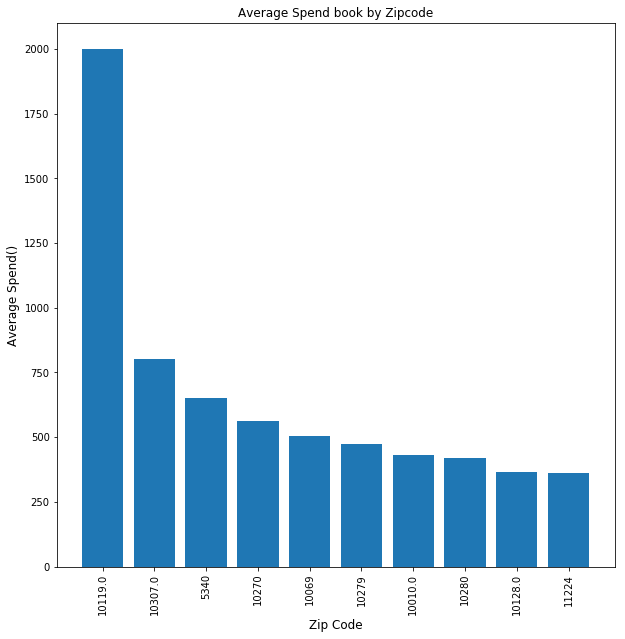

city
 Brooklyn                72.40
 Brooklyn                51.69
 Crown Heights,NY        61.42
 New York                83.04
11211                    47.48
11220                    50.40
8425 Elmhurst avenue     67.87
ARVERNE                  80.00
ASTORIA/LIC              61.94
Arverne                 131.39
Arverne                 176.32
Astoria                 104.83
Astoria                 109.32
Astoria - New York       44.26
Astoria New York         52.04
Astoria Queens           59.07
Astoria, N.Y.C.          68.43
Astoria, New York       150.00
Astoria, New York        59.60
Astoria, Queens          73.21
Astoria,New York         60.57
Astoria,Queens          100.18
Atlantic Beach          302.70
Auburndale              129.14
Averne                  250.00
BK                      220.58
BRONX                    40.00
BROOKLYN                 65.00
BROOKLYN                 51.74
Bayside                 132.74
                         ...  
elmhurst Queens          50.00
flu

In [152]:
spend_city = new_df[["id","city",'avg_spend', 'total_spend', 'list_number']]
spend_city

spend_city['zipcode'] = spend_zip.zipcode.astype('object')

spend_city

avg_spend_mean = spend_zip.groupby("zipcode")['avg_spend'].mean()

pd.DataFrame(avg_spend_mean)

avg_spend_mean = avg_spend_mean.sort_values(axis=0, ascending=False)

avg_spend_mean = avg_spend_mean.iloc[0:10]

avg_spend_mean

plt.figure(figsize = (10,10))
plt.bar(range(len(avg_spend_mean)),avg_spend_mean.values)
plt.xticks(range(len(avg_spend_mean.values)),list(avg_spend_mean.index), rotation=90)
plt.title("Average Spend book by Zipcode")

plt.ylabel('Average Spend()', fontsize=12)
plt.xlabel('Zip Code', fontsize=12)

plt.savefig("Average Spend book by Zipcode.png")
plt.show()

spend_city = new_df[["id","city",'avg_spend', 'total_spend', 'list_number']]
spend_city


avg_list_mean = spend_zip.groupby("zipcode")['list_number'].mean()

pd.DataFrame(avg_spend_mean)

# avg_spend_mean = avg_spend_mean.sort_values(axis=0, ascending=False)

avg_spend_mean = avg_spend_mean.iloc[0:10]

avg_spend_mean

spend_city.groupby("city")['avg_spend'].mean()

In [153]:

listnum_div = new_df['list_number']/365

listnum_div

list_div = pd.DataFrame({'perc_book':listnum_div})

list_div

# pd.DataFrame(dart)

part_df = pd.concat([new_df, list_div],axis=1)

part_df

corr_new = part_df.corr()

new = corr_new.sort_values('perc_book', ascending=False)

new= new['perc_book']

new



list_number                       1.00
perc_book                         1.00
availability_365                  1.00
availability_90                   0.42
availability_60                   0.39
total_spend                       0.36
availability_30                   0.32
calculated_host_listings_count    0.14
number_of_reviews                 0.13
longitude                         0.09
accommodates                      0.09
beds                              0.09
bedrooms                          0.08
guests_included                   0.07
avg_spend                         0.07
bathrooms                         0.06
host_listings_count               0.05
host_total_listings_count         0.05
square_feet                       0.04
minimum_nights                    0.02
maximum_nights                   -0.01
latitude                         -0.02
reviews_per_month                -0.04
host_id                          -0.04
review_scores_cleanliness        -0.07
review_scores_checkin    

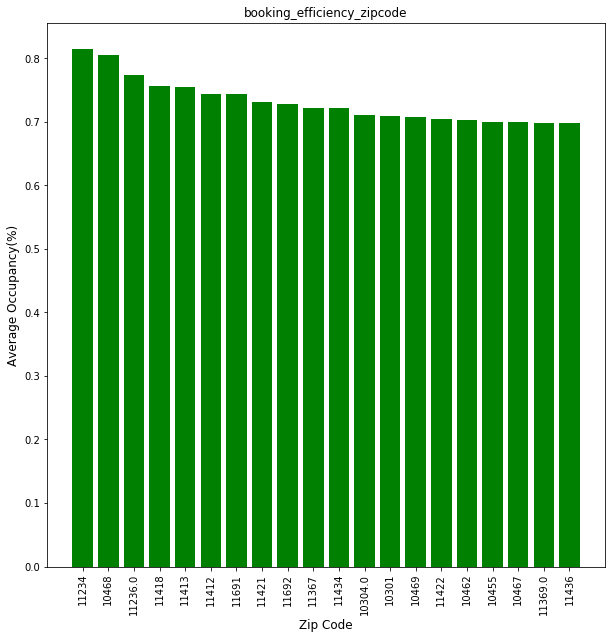

zipcode
11234     0.81
10468     0.81
11236.0   0.77
11418     0.76
11413     0.76
11412     0.74
11691     0.74
11421     0.73
11692     0.73
11367     0.72
11434     0.72
10304.0   0.71
10301     0.71
10469     0.71
11422     0.70
10462     0.70
10455     0.70
10467     0.70
11369.0   0.70
11436     0.70
Name: perc_book, dtype: float64

In [154]:
spend_city = new_df[["id","zipcode",'avg_spend', 'total_spend', 'list_number']]
spend_city

# zipcode = spend_city.groupby("zipcode")

avg_spend = spend_city.groupby("zipcode")['avg_spend'].mean()

avg_list = spend_city.groupby("zipcode")['list_number'].mean()

tot_spend = spend_city.groupby("zipcode")['total_spend'].mean()

id_count = spend_city.groupby("zipcode")['id'].count()

group_zipcode = pd.DataFrame({'id_count':id_count,'avg_spend':avg_spend,'tot_spend':tot_spend, 'avg_list':avg_list})

group_zipcode.sort_values('id_count', ascending=False)

group_zipcode = group_zipcode[group_zipcode['id_count'] > 20]

group_zipcode = group_zipcode.sort_values('avg_list', ascending=False)

group_zipcode

#create percent booked dataframe

list_div = group_zipcode['avg_list']/365

list_div

list_div = pd.DataFrame({'perc_book':list_div})

list_div



group_zipcode = pd.concat([group_zipcode, list_div],axis=1)

group_zipcode

#Select top 20 percent booked

ten_zip = group_zipcode.iloc[0:20]

ten_zip_perc = ten_zip['perc_book']

#create Graph

plt.figure(figsize = (10,10))
plt.bar(range(len(ten_zip_perc)),ten_zip_perc.values, color="green")
plt.xticks(range(len(ten_zip_perc.values)),list(ten_zip_perc.index), rotation=90)
plt.title("booking_efficiency_zipcode")

plt.ylabel('Average Occupancy(%)', fontsize=12)
plt.xlabel('Zip Code', fontsize=12)

plt.savefig("Images/booking_efficiency.png")
plt.show()

ten_zip_perc

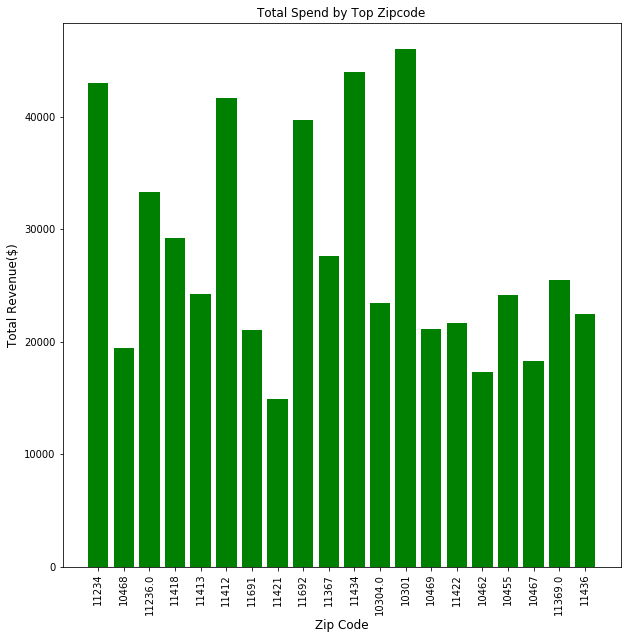

zipcode
11234     42975.08
10468     19469.03
11236.0   33333.37
11418     29189.32
11413     24226.43
11412     41693.36
11691     21003.98
11421     14919.98
11692     39693.81
11367     27590.64
11434     43984.62
10304.0   23425.38
10301     46022.22
10469     21111.56
11422     21688.77
10462     17325.45
10455     24147.93
10467     18230.87
11369.0   25483.98
11436     22427.00
Name: tot_spend, dtype: float64

In [155]:
ten_zip_tot = ten_zip['tot_spend']



plt.figure(figsize = (10,10))
plt.bar(range(len(ten_zip_tot)),ten_zip_tot.values, color="green")
plt.xticks(range(len(ten_zip_tot.values)),list(ten_zip_tot.index), rotation=90)
plt.title("Total Spend by Top Zipcode")

plt.ylabel('Total Revenue($)', fontsize=12)
plt.xlabel('Zip Code', fontsize=12)

plt.savefig("Images/tot_zip_spend.png")
plt.show()

ten_zip_tot

In [156]:
Evaluate Occupancy rate verses 

perc = group_zipcode['perc_book']
spend = group_zipcode['avg_spend']

x_axis = perc.index

x_limit = 500

x_axis = np.arange(0, x_limit, 1)

plt.scatter(x=perc, y=spend, marker="o", facecolors="blue", edgecolors="r", alpha=1, s=100)

plt.title("Average Price by Occupancy Rate")
plt.ylabel('Average Price Per Day($)', fontsize=12)
plt.xlabel('Occupancy Rate', fontsize=12)

plt.savefig("Images/booking_by_avgprice.png")
plt.show()

SyntaxError: invalid syntax (<ipython-input-156-581a9698626e>, line 1)

In [ ]:
# Create new Data Frame to analyze neighbourhood

spend_nbhood = new_df[["id",'neighbourhood','avg_spend', 'total_spend', 'list_number']]
spend_nbhood

spend_nbhood

nb_ct_div = spend_nbhood['list_number']/365

nb_ct_div

nb_ct_div = pd.DataFrame({'perc_book':nb_ct_div})

nb_ct_div

fin_spend_nbhood = pd.concat([spend_nbhood, nb_ct_div],axis=1)

fin_spend_nbhood


nb_ct_avgspend = fin_spend_nbhood.groupby('neighbourhood')['avg_spend'].mean()

nb_ct_totspend = fin_spend_nbhood.groupby('neighbourhood')['total_spend'].mean()

nb_ct_listnum = fin_spend_nbhood.groupby('neighbourhood')['list_number'].mean()

nb_ct_percb = fin_spend_nbhood.groupby('neighbourhood')['perc_book'].mean()

nb_ct_id = fin_spend_nbhood.groupby('neighbourhood')['id'].count()


group_nbhood = pd.DataFrame({'id_count':nb_ct_id,'avg_spend':nb_ct_avgspend,'tot_spend':nb_ct_totspend, 
                              'avg_list':nb_ct_listnum, 'perc_book':nb_ct_percb})

id_nbhood = group_nbhood.sort_values('id_count', ascending=False)

group_nbhood = group_nbhood[group_nbhood['id_count'] > 5]

group_nbhood = group_nbhood.sort_values('perc_book', ascending=False)

group_nbhood

ten_nbhood = group_nbhood.iloc[0:25]

ten_nbhood_perc = ten_nbhood['perc_book']

plt.figure(figsize = (10,10))
plt.bar(range(len(ten_nbhood_perc)),ten_nbhood_perc.values)
plt.xticks(range(len(ten_nbhood_perc.values)),list(ten_nbhood_perc.index), rotation=90)
plt.title("booking_efficiency_nb")

plt.savefig("booking_efficiency_nb.png")
plt.show()

ten_nbhood_avgspnd = ten_nbhood['avg_spend']

plt.figure(figsize = (10,10))
plt.bar(range(len(ten_nbhood_avgspnd)),ten_nbhood_avgspnd.values)
plt.xticks(range(len(ten_nbhood_avgspnd.values)),list(ten_nbhood_avgspnd.index), rotation=90)
plt.title("Average Spend per Night by Neighbourhood")

plt.savefig("avg_spend_nb.png")
plt.show()


ten_nbhood_totspnd = ten_nbhood['tot_spend']

plt.figure(figsize = (10,10))
plt.bar(range(len(ten_nbhood_totspnd)),ten_nbhood_totspnd.values)
plt.xticks(range(len(ten_nbhood_totspnd.values)),list(ten_nbhood_totspnd.index), rotation=90)
plt.title("Total Spend per Night by Neighbourhood")

plt.savefig("tot_spend_nb.png")
plt.show()



In [ ]:
ten_nbhood_totspnd.sort_values(ascending=False)

In [ ]:
#create new DataFrame to analyze Boroughs
spend_nbhg = new_df[["id",'neighbourhood_group','avg_spend', 'total_spend', 'list_number']]
spend_nbhg 


nb_ct_div = (spend_nbhg ['list_number']/365)*100

nb_ct_div

nb_ct_div = pd.DataFrame({'perc_book':nb_ct_div})

nb_ct_div

fin_spend_nbhood = pd.concat([spend_nbhg, nb_ct_div],axis=1)

fin_spend_nbhood


nb_ct_avgspend = fin_spend_nbhood.groupby('neighbourhood_group')['avg_spend'].mean()

nb_ct_totspend = fin_spend_nbhood.groupby('neighbourhood_group')['total_spend'].mean()

nb_ct_listnum = fin_spend_nbhood.groupby('neighbourhood_group')['list_number'].mean()

nb_ct_percb = fin_spend_nbhood.groupby('neighbourhood_group')['perc_book'].mean()

nb_ct_id = fin_spend_nbhood.groupby('neighbourhood_group')['id'].count()


group_nbhood = pd.DataFrame({'id_count':nb_ct_id,'avg_spend':nb_ct_avgspend,'tot_spend':nb_ct_totspend, 
                              'avg_list':nb_ct_listnum, 'perc_book':nb_ct_percb})

group_nbhood

perc_nbhg = group_nbhood.sort_values('perc_book', ascending=False)

perc_nbhg


perc_nbhg_avgspnd = perc_nbhg['perc_book']

plt.figure(figsize = (10,10))
plt.bar(range(len(perc_nbhg_avgspnd)),perc_nbhg_avgspnd.values, color="red")
plt.xticks(range(len(perc_nbhg_avgspnd.values)),list(perc_nbhg_avgspnd.index), rotation=0)
plt.title("Average Occupancy by Borough")

plt.ylabel('Avverage Occupancy(%)', fontsize=12)
plt.xlabel('Borough', fontsize=12)

plt.savefig("Images/booking_efficiency_nbhg.png")
plt.show()

nbhg_avgspnd = perc_nbhg['avg_spend']

plt.figure(figsize = (10,10))
plt.bar(range(len(nbhg_avgspnd)),nbhg_avgspnd.values, color="red")
plt.xticks(range(len(nbhg_avgspnd.values)),list(nbhg_avgspnd.index), rotation=0)
plt.title("Average Spend per Night by Borough")

plt.ylabel('Revenues($)', fontsize=12)
plt.xlabel('Borough', fontsize=12)

plt.savefig("Images/avg_spend_nbhg.png")
plt.show()


nbhg_totspnd = perc_nbhg['tot_spend']

plt.figure(figsize = (10,10))
plt.bar(range(len(nbhg_totspnd)),nbhg_totspnd.values, color="red")
plt.xticks(range(len(nbhg_totspnd.values)),list(nbhg_totspnd.index), rotation=0)
plt.title("Total Spend per Night by Borough")

plt.ylabel('Revenues($)', fontsize=12)
plt.xlabel('Borough', fontsize=12)

plt.savefig("Images/tot_spend_nbhg.png")
plt.show()

In [157]:
group_nbhood

,id_count,avg_spend,tot_spend,avg_list,perc_book
neighbourhood_group,,,,,
Bronx,680,87.96,21707.35,239.54,65.63
Brooklyn,11723,131.82,26599.82,191.88,52.57
Manhattan,12679,207.93,42151.88,185.81,50.91
Queens,3392,104.26,23896.38,220.75,60.48
Staten Island,261,121.24,33286.61,250.45,68.62


In [158]:
spend_host = new_df[["id",'host_id', 'host_is_superhost' ,'host_listings_count', 'host_total_listings_count','avg_spend', 'total_spend', 'list_number']]

spend_host

host_div = spend_host ['list_number']/365

host_div

host_div = pd.DataFrame({'perc_book':host_div})

host_div

fin_spend_host = pd.concat([spend_host, host_div],axis=1)

fin_spend_host

# fin_spend_host = fin_spend_host[fin_spend_host['host_is_superhost'] >= "f"]

fin_spend_host = fin_spend_host[fin_spend_host.values  == "t"]

host_group = fin_spend_host.groupby(['host_id', 'host_is_superhost']).mean()

host_group

avg_host = host_group.sort_values('avg_spend', ascending=False)

avg_host = avg_host.reset_index()

# Select only Superhosts

avg_host_super = avg_host_super[avg_host_super.values  == "t"]

avg_host_super



avg_host_super = avg_host_super.sort_values('avg_spend', ascending=False)

avg_host_super

superhost = fin_spend_host['host_is_superhost']



host_id = fin_spend_host.groupby('host_id')['id'].count()

host_avgspend = fin_spend_host.groupby('host_id')['avg_spend'].mean()

host_totspend = fin_spend_host.groupby('host_id')['total_spend'].sum()
                                       
host_listnum = fin_spend_host.groupby('host_id')['list_number'].mean()

host_percb = fin_spend_host.groupby('host_id')['perc_book'].mean() 

host_lists = fin_spend_host.groupby('host_id')['host_listings_count'].mean() 


# host_super_g = fin_spend_host.groupby(['host_id', 'host_listings_count'])



# host_super_g = pd.DataFrame(host_super_g)

# pd.DataFramme(host_super_g)

group_host = pd.DataFrame({'id_count': host_id, 'host_listings_count':host_lists, 'avg_spend':host_avgspend,'tot_spend':host_totspend, 
                              'avg_list':host_listnum, 'perc_book':host_percb})

group_host

sort_host = group_host[group_host['host_listings_count'] > 5]

sort_host = sort_host.sort_values('tot_spend', ascending=False)

sort_host

sort_host = sort_host.iloc[0:10]

mean_host = sort_host.apply(np.mean)

pd.options.display.float_format = '{:.2f}'.format


sort_host



,id_count,host_listings_count,avg_spend,tot_spend,avg_list,perc_book
host_id,,,,,,
836168,10,13.00,1845.07,6724500.00,364.10,1.00
1177497,11,11.00,1430.64,5734685.00,362.27,0.99
42619297,4,10.00,881.72,1062937.00,305.50,0.84
61244076,7,7.00,536.95,869062.00,242.29,0.66
57257950,7,8.00,292.31,731897.00,357.43,0.98
17152076,6,6.00,308.62,674706.00,364.50,1.00
28381203,3,10.00,455.98,490815.00,358.67,0.98
26377263,35,47.00,46.46,422191.00,258.74,0.71
50573299,1,8.00,1314.84,416803.00,317.00,0.87


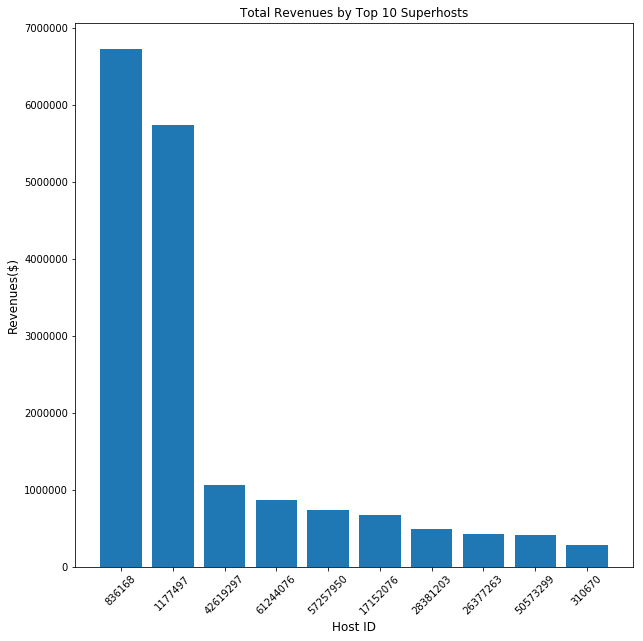

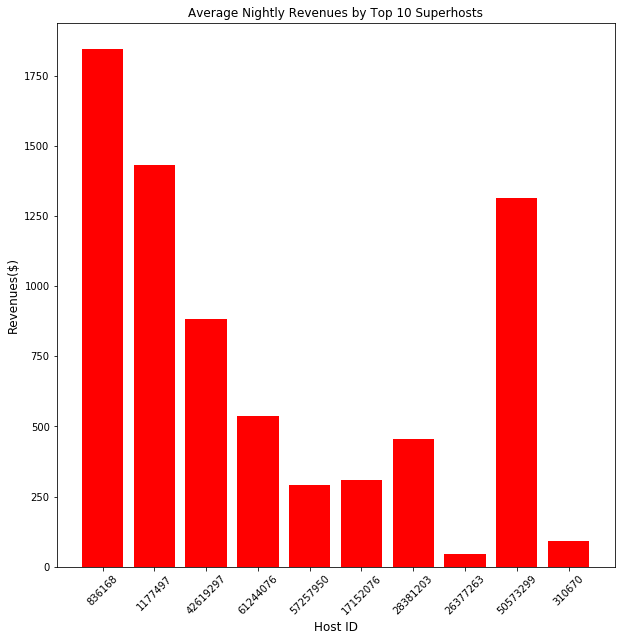

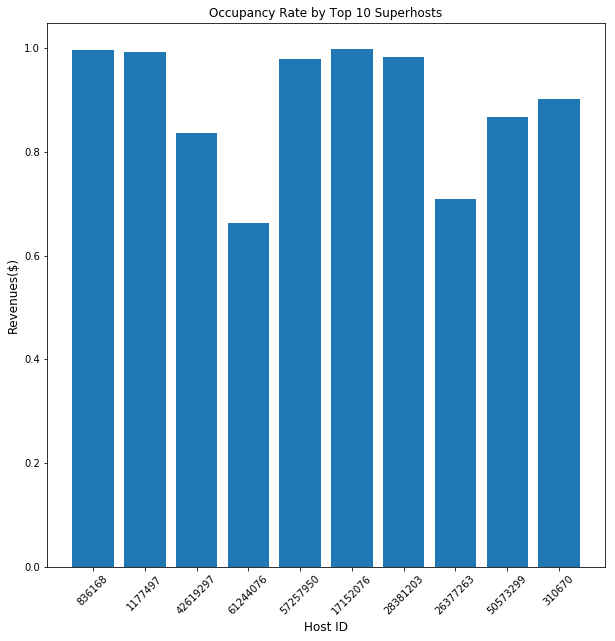

In [159]:
host_totspnd = sort_host['tot_spend']

plt.figure(figsize = (10,10))
plt.bar(range(len(host_totspnd)),host_totspnd.values)
plt.xticks(range(len(host_totspnd.values)),list(host_totspnd.index), rotation=45)
plt.title("Booking Efficiency by Borough")
plt.title("Total Revenues by Top 10 Superhosts")

# host_totspnd.set_xlabel("Host ID")
# host_totspnd.set_ylabel("Total Revenues")

plt.ylabel('Revenues($)', fontsize=12)
plt.xlabel('Host ID', fontsize=12)

plt.savefig("Images/top_superhost_revenues.png")
plt.show()



host_avgspnd = sort_host['avg_spend']

plt.figure(figsize = (10,10))
plt.bar(range(len(host_avgspnd)),host_avgspnd.values, color="red")
plt.xticks(range(len(host_avgspnd.values)),list(host_avgspnd.index), rotation=45)
plt.title("Average Nightly Revenues by Top 10 Superhosts")


plt.ylabel('Revenues($)', fontsize=12)
plt.xlabel('Host ID', fontsize=12)

plt.savefig("Images/avg_superhost_revenues.png")
plt.show()

host_perc = sort_host['perc_book']

plt.figure(figsize = (10,10))
plt.bar(range(len(host_perc)),host_perc.values)
plt.xticks(range(len(host_perc.values)),list(host_perc.index), rotation=45)
plt.title("Occupancy Rate by Top 10 Superhosts")


plt.ylabel('Revenues($)', fontsize=12)
plt.xlabel('Host ID', fontsize=12)

plt.savefig("Images/avg_occupancy_rate.png")
plt.show()

In [160]:
#new DataFrame to analyze superhosts

spend_host = new_df[["id",'host_id', 'host_is_superhost' ,'host_listings_count', 'host_total_listings_count','avg_spend', 'total_spend', 'list_number']]

spend_host

host_div = spend_host ['list_number']/365

host_div

host_div = pd.DataFrame({'perc_book':host_div})

host_div

fin_spend_host = pd.concat([spend_host, host_div],axis=1)

fin_spend_host

fin_spend_host = fin_spend_host[fin_spend_host['host_is_superhost'] >= "f"]

fin_spend_host

host_group = fin_spend_host.groupby(['host_id', 'host_is_superhost']).mean()

host_group

avg_host = host_group.sort_values('avg_spend', ascending=False)

avg_host = avg_host.reset_index()

# pd.DataFrame()

avg_host_super = avg_host[avg_host['host_is_superhost'] >= "f"]

avg_host_super

avg_host_super = avg_host_super.sort_values('avg_spend', ascending=False)

avg_host_super

# superhost = fin_spend_host['host_is_superhost']

# superhost

avg_host_super.mean()


host_id                     39583320.60
id                          11848127.15
host_listings_count                1.65
host_total_listings_count          1.65
avg_spend                        168.01
total_spend                    33135.62
list_number                      185.25
perc_book                          0.51
dtype: float64